In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
raw_data = pd.read_csv('insurance.csv')
print(raw_data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
#clean data
print('Data shape:',raw_data.shape)
print(raw_data.info(),'\n')
print(raw_data.describe(),'\n')
for cat_col in ['sex', 'smoker', 'region']:
    print(raw_data[cat_col].value_counts(sort=True),'\n')

print('duplicate row count:',raw_data.duplicated().sum(),'\n')

data = raw_data.drop_duplicates()
print(data.shape)

#no missing values
#ranges of values for each column look sensible, no obviously invalid data
#one duplicated row, opted to remove it

Data shape: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None 

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.

In [4]:
#new columns
def obesity(bmi):
    if bmi < 18.5:
        return 'underweight'
    if bmi < 25:
        return 'healthy'
    if bmi < 30:
        return 'overweight'
    if bmi < 40:
        return 'obese'
    else:
        return 'severely obese'

def age_group(age):
    if age < 30:
        return 'young'
    if age < 60:
        return 'middle aged'
    else:
        return 'senior'

data = raw_data.drop_duplicates()
data['health category'] = data.bmi.apply(obesity)
data['age group'] = data.age.apply(age_group)
print(data.head())

for cat_col in ['health category', 'age group']:
    print(data[cat_col].value_counts(sort=True))

   age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

  health category    age group  
0      overweight        young  
1           obese        young  
2           obese        young  
3         healthy  middle aged  
4      overweight  middle aged  
health category
obese             615
overweight        386
healthy           225
severely obese     91
underweight        20
Name: count, dtype: int64
age group
middle aged    807
young          416
senior         114
Name: count, dtype: int64


C:\Users\hal\AppData\Local\Temp\ipykernel_14624\3339754010.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['health category'] = data.bmi.apply(obesity)
C:\Users\hal\AppData\Local\Temp\ipykernel_14624\3339754010.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age group'] = data.age.apply(age_group)


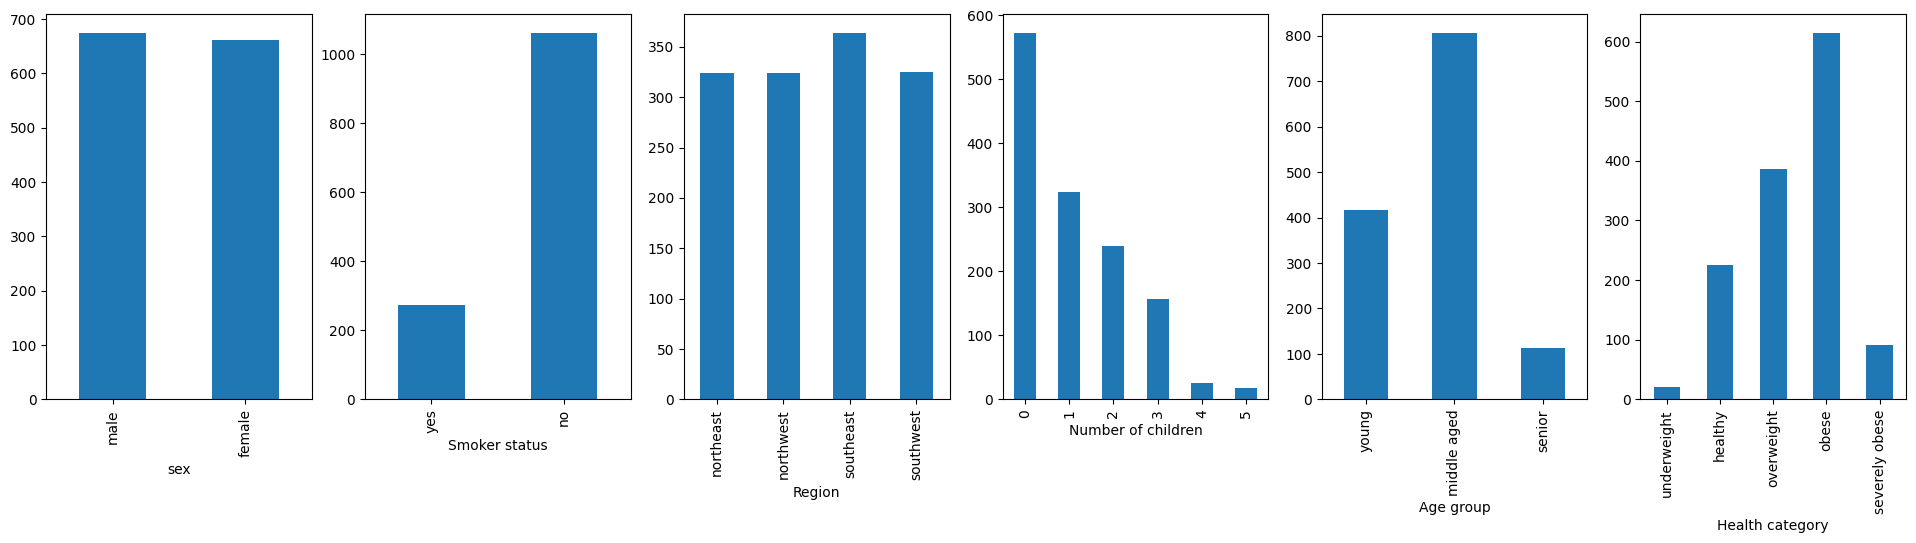

In [5]:
#categorical variable distribution
count_plots={
    'sex':{'index':['male','female'], 'xlabel':'sex'},
    'smoker':{'index':['yes','no'], 'xlabel':'Smoker status'},
    'region':{'index':['northeast','northwest','southeast','southwest'], 'xlabel':'Region'},
    'children':{'index':[0,1,2,3,4,5],'xlabel':'Number of children'},
    'age group':{'index':['young','middle aged','senior'], 'xlabel':'Age group'},
    'health category':{'index':['underweight','healthy','overweight','obese','severely obese'], 'xlabel':'Health category'}}

fig, ax = plt.subplots(nrows=1,ncols=6,figsize=(24, 5))
n=0
for col in count_plots.keys():
    count_df = data[col].value_counts().loc[count_plots[col]['index']]
    count_df.plot(kind='bar', xlabel=count_plots[col]['xlabel'], ax=ax[n])
    
    n += 1
plt.show()

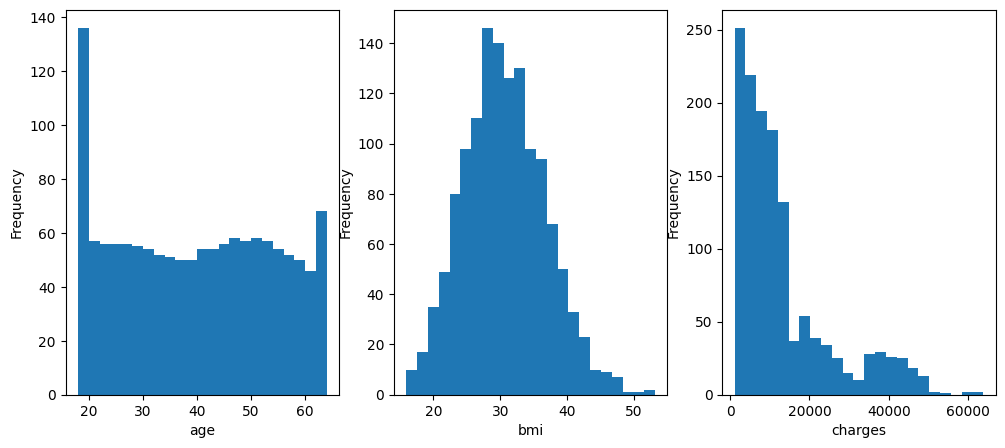

In [6]:
#Distribution of continuous variables
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12, 5))
n=0
for col in ['age','bmi','charges']:
    count_df = data[col].plot(kind='hist',ax=ax[n],xlabel=col,bins=23)
    n += 1
plt.show()

NameError: name 'flierprops' is not defined

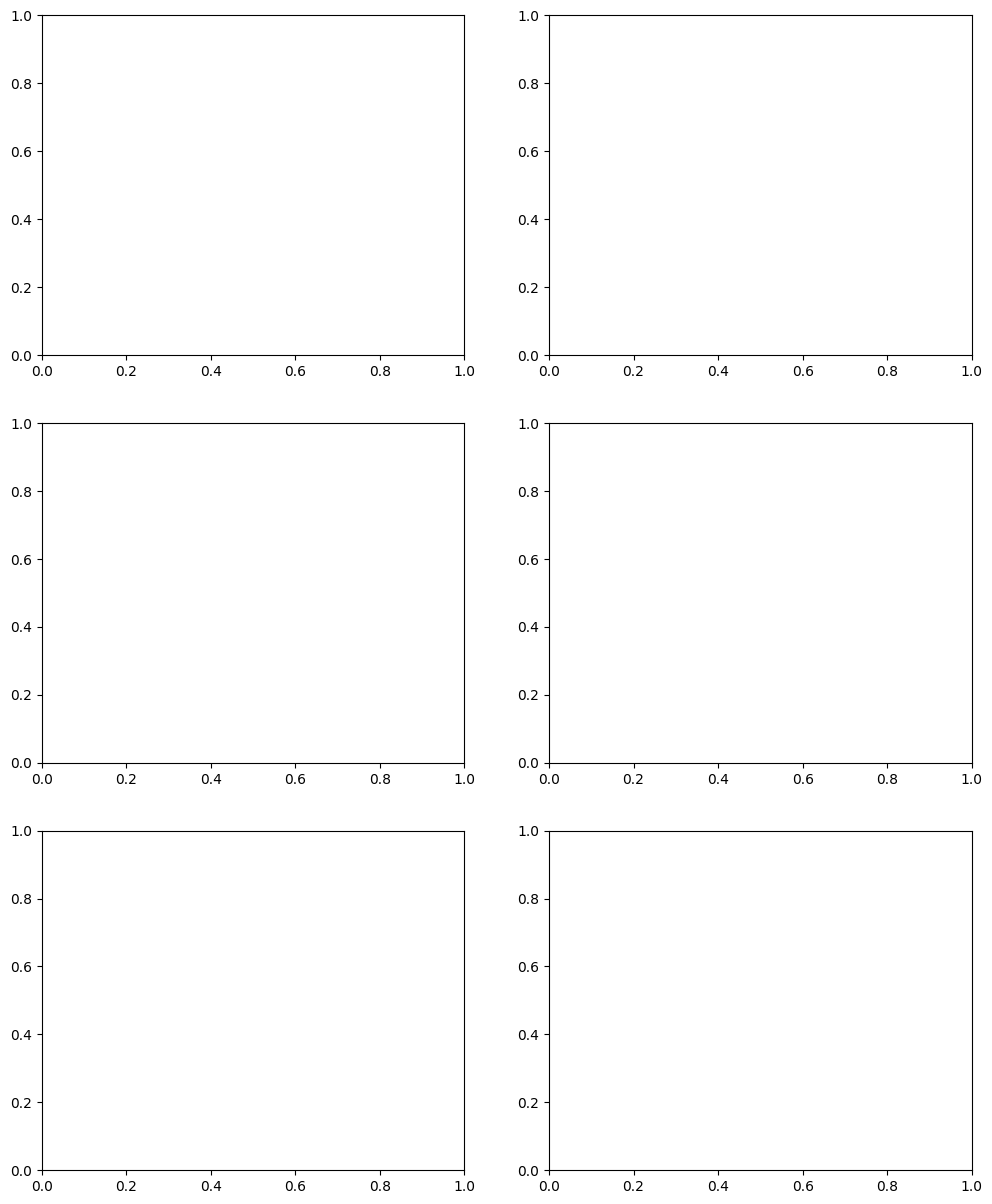

In [7]:
#Effect of categorical variables on insurance costs
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(12, 15))
n,m = (0,0)
for col in count_plots.keys():
    sns.boxplot(x=col, y='charges',data=data, ax=ax[n][m], order=count_plots[col]['index'],flierprops=flierprops)
    ax[n][m].set_xlabel(col.capitalize())
    if m == 0:
        ax[n][m].set_ylabel('Insurance charges ($)')
    else:
        ax[n][m].set_ylabel('')
    m += 1
    if m == 2:
        n += 1
        m = 0
plt.show()

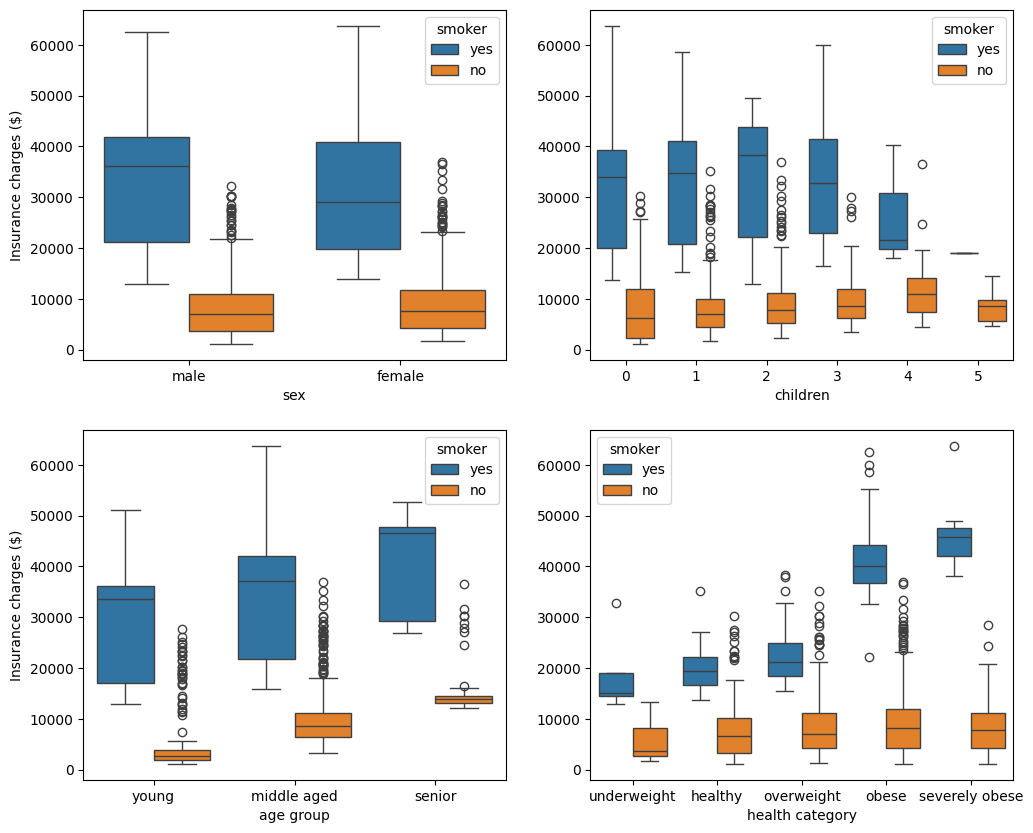

In [8]:
#Effect of categorical variables on insurance costs controlling for smoking
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(12, 10))
n,m = (0,0)
flierprops = dict(marker='.', markerfacecolor='None', markersize=5,  markeredgecolor='black',alpha=0.5)
for col in count_plots.keys():
    if col in ['smoker','region']:
        continue
    sns.boxplot(x=col, y='charges',data=data, ax=ax[n][m], order=count_plots[col]['index'], hue='smoker')
    if m == 0:
        ax[n][m].set_ylabel('Insurance charges ($)')
    else:
        ax[n][m].set_ylabel('')
    m += 1
    if m == 2:
        n += 1
        m = 0
plt.show()

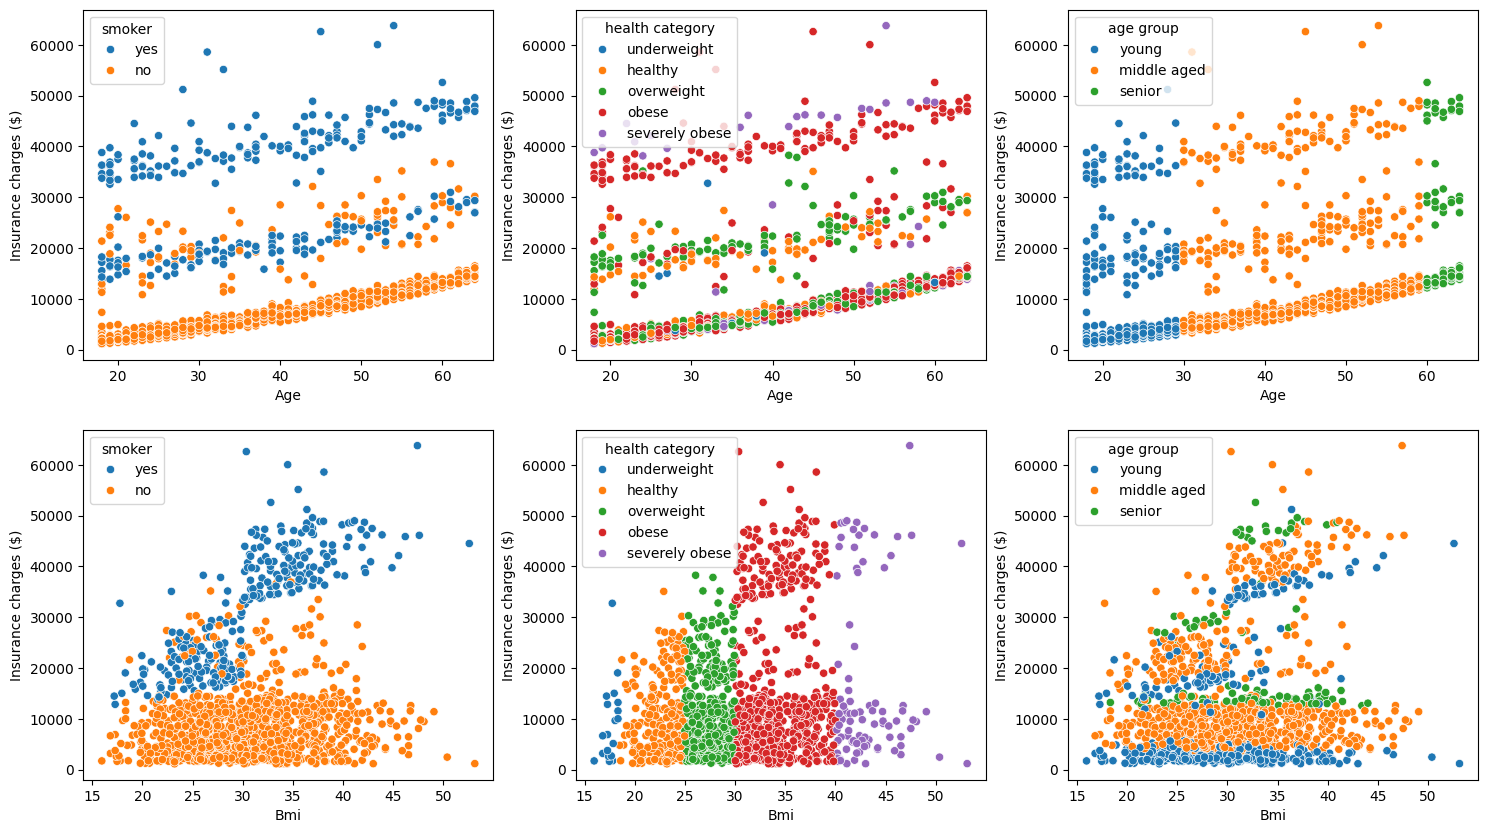

In [9]:
#Effect of continuous variables on insurance costs, controlling for smoking, bmi category, and age group
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(18, 10))
n,m = (0,0)
for col in ['age','bmi']:
    for hue_col in ['smoker','health category', 'age group']:
        if hue_col == 'health category':
            sns.scatterplot(x=col,y='charges',data=data,ax=ax[m][n],hue=hue_col,hue_order=['underweight','healthy','overweight','obese','severely obese'])
        else:
            sns.scatterplot(x=col,y='charges',data=data,ax=ax[m][n],hue=hue_col)
        ax[m][n].set_xlabel(col.capitalize())
        ax[m][n].set_ylabel('Insurance charges ($)')
        n += 1
    n = 0
    m += 1
plt.show()

In [10]:
#correlations
print(data[['bmi','age','charges']].corr())
for stat in ['yes','no']:
    data_smoke = data[data.smoker==stat]
    print(stat,data_smoke[['bmi','age','charges']].corr())

              bmi       age   charges
bmi      1.000000  0.109344  0.198401
age      0.109344  1.000000  0.298308
charges  0.198401  0.298308  1.000000
yes               bmi       age   charges
bmi      1.000000  0.059674  0.806481
age      0.059674  1.000000  0.368224
charges  0.806481  0.368224  1.000000
no               bmi       age   charges
bmi      1.000000  0.122745  0.084077
age      0.122745  1.000000  0.627400
charges  0.084077  0.627400  1.000000


In [12]:
ML_data = data.drop(columns=['region','health category','age group'])
ML_data.to_csv('ML_insurance_data_clean.csv',index=False)